In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
#read the tsv file 
df=pd.read_csv("spam.tsv",sep='\t')

In [5]:
df.head(5)

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [6]:
#check for null values
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [7]:
#output class distribution
df["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [10]:
spam_df=df[df["label"]=="spam"]
spam_df.shape

(747, 4)

In [11]:
ham_df=df[df["label"]=="ham"]
ham_df.shape

(4825, 4)

In [12]:
#the dataset is imbalanced so to balance it we take the number of spam messages alone from ham
new_ham_df=ham_df.sample(spam_df.shape[0])
new_ham_df.shape

(747, 4)

In [13]:
#now append both the dataframe
data_df=new_ham_df.append(spam_df,ignore_index=True)
data_df.shape

(1494, 4)

# Exploratory Data Analysis

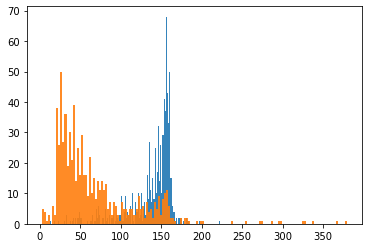

In [14]:
plt.hist(data_df[data_df["label"]=="spam"]["length"],bins=150,alpha=0.9)
plt.hist(data_df[data_df["label"]=="ham"]["length"],bins=150,alpha=0.9)
plt.show()

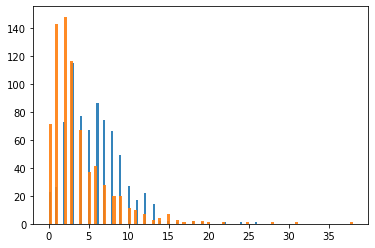

In [15]:
plt.hist(data_df[data_df["label"]=="spam"]["punct"],bins=100,alpha=0.9)
plt.hist(data_df[data_df["label"]=="ham"]["punct"],bins=100,alpha=0.9)
plt.show()

# Data Preparation

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
x_train,x_test,y_train,y_test=train_test_split(data_df["message"],data_df["label"],test_size=0.3,random_state=0,shuffle=True,stratify=data_df["label"])
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


(1045,) (1045,)
(449,) (449,)


# Pipeline RandomForestClassifier

In [18]:
classifier=Pipeline([("tfidf",TfidfVectorizer()),("rfc",RandomForestClassifier(n_estimators=100,n_jobs=-1))])

In [15]:
classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [16]:
y_pred=classifier.predict(x_test)

In [17]:
confusion_matrix(y_test,y_pred)

array([[224,   1],
       [ 24, 200]], dtype=int64)

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       225
        spam       1.00      0.89      0.94       224

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



In [19]:
accuracy_score(y_test,y_pred)

0.9443207126948775

In [20]:
classifier.predict(["Hi i am doing good how about you"])

array(['ham'], dtype=object)

In [21]:
classifier.predict(["you have won free tickets to US"])

array(['spam'], dtype=object)

# Pipeline SVM Classifier

In [22]:
classifier=Pipeline([("tfidf",TfidfVectorizer()),("svm",SVC(C=100,gamma='auto'))])

In [23]:
classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('svm', SVC(C=100, gamma='auto'))])

In [24]:
y_pred=classifier.predict(x_test)

In [25]:
confusion_matrix(y_test,y_pred)

array([[224,   1],
       [ 34, 190]], dtype=int64)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.87      1.00      0.93       225
        spam       0.99      0.85      0.92       224

    accuracy                           0.92       449
   macro avg       0.93      0.92      0.92       449
weighted avg       0.93      0.92      0.92       449



In [27]:
accuracy_score(y_test,y_pred)

0.9220489977728286